In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
path = 'Questionnaire.csv'
Survey = pd.read_csv(path)

In [52]:
Survey.head()

,Timestamp,mbti,fav_colour,life_value,settle_city,single_child,comfort_zone,parental_relationship,childhood_experience,parent_contact_frequency,place_grow_up,age
0,2024/10/17 12:54:26 PM GMT+1,INTP,blue,family,bustling metropolis,yes,by yourself,neutral,neutral,daily,bustling metropolis,16 to 25
1,2024/10/17 12:58:32 PM GMT+1,No idea,red,family,everywhere,no,by yourself,positive,positive,daily,bustling metropolis,16 to 25
2,2024/10/17 1:02:58 PM GMT+1,No idea,green,family,no place,no,with someone,positive,neutral,monthly,countryside village,16 to 25
3,2024/10/17 1:06:48 PM GMT+1,ENFJ,red,family,coastal,no,with someone,positive,positive,daily,countryside village,25 to 35
4,2024/10/17 1:07:15 PM GMT+1,ENFP,blue,family,coastal,yes,NaN,neutral,positive,weekly,quiet suburb,16 to 25


In [53]:
# The attribution of place people grew up in  and wish to settle done

In [54]:
hometown_attri = Survey['place_grow_up'].tolist()
print (hometown_attri)

['bustling metropolis', 'bustling metropolis', 'countryside village', 'countryside village', 'quiet suburb', 'bustling metropolis', 'quiet suburb', 'coastal', 'coastal', 'bustling metropolis', 'everywhere', 'bustling metropolis', 'Isolated country', 'bustling metropolis', 'bustling metropolis', 'bustling metropolis', 'bustling metropolis', 'bustling metropolis', 'bustling metropolis']


In [55]:
place_counts = pd.Series(hometown_attri).value_counts()
print (place_counts)

bustling metropolis    11
countryside village     2
quiet suburb            2
coastal                 2
everywhere              1
Isolated country        1
Name: count, dtype: int64


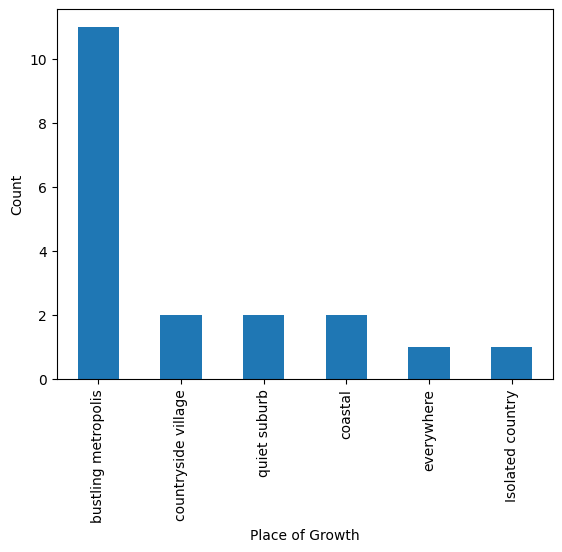

In [56]:
place_counts.plot(kind='bar')
plt. title = hometown_attri
plt. xlabel ('Place of Growth')
plt. ylabel ('Count')
plt.show()

In [57]:
# Most of the people in our group grew up in big cities.

In [58]:
# How does childhood upbringing influence future preferred settling place?
# Hypothesis - people with positive childhood experiences will tend to settle in similar places, vice versa

In [59]:
sliced_survey = Survey[['place_grow_up','childhood_experience','settle_city']]
print(sliced_survey)

          place_grow_up childhood_experience          settle_city
0   bustling metropolis              neutral  bustling metropolis
1   bustling metropolis             positive           everywhere
2   countryside village              neutral             no place
3   countryside village             positive              coastal
4          quiet suburb             positive              coastal
5   bustling metropolis             positive         quiet suburb
6          quiet suburb             positive  countryside village
7               coastal          challenging  bustling metropolis
8               coastal             positive              coastal
9   bustling metropolis             positive           everywhere
10           everywhere             positive           everywhere
11  bustling metropolis             positive  bustling metropolis
12     Isolated country          challenging           everywhere
13  bustling metropolis          challenging  bustling metropolis
14  bustli

In [60]:
type(sliced_survey)

pandas.core.frame.DataFrame

In [61]:
sliced_survey['neutral_positive']= sliced_survey['childhood_experience'].apply(lambda x:  x in ['neutral','positive'])
sliced_survey

/var/folders/8t/h_ygnqfn40n6grnn231r3rlm0000gn/T/ipykernel_46518/3449680722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_survey['neutral_positive']= sliced_survey['childhood_experience'].apply(lambda x:  x in ['neutral','positive'])


,place_grow_up,childhood_experience,settle_city,neutral_positive
0,bustling metropolis,neutral,bustling metropolis,True
1,bustling metropolis,positive,everywhere,True
2,countryside village,neutral,no place,True
3,countryside village,positive,coastal,True
4,quiet suburb,positive,coastal,True
5,bustling metropolis,positive,quiet suburb,True
6,quiet suburb,positive,countryside village,True
7,coastal,challenging,bustling metropolis,False
8,coastal,positive,coastal,True
9,bustling metropolis,positive,everywhere,True


In [62]:
true_survey = sliced_survey[['place_grow_up','childhood_experience','settle_city','neutral_positive']]
print(true_survey)

          place_grow_up childhood_experience          settle_city  \
0   bustling metropolis              neutral  bustling metropolis   
1   bustling metropolis             positive           everywhere   
2   countryside village              neutral             no place   
3   countryside village             positive              coastal   
4          quiet suburb             positive              coastal   
5   bustling metropolis             positive         quiet suburb   
6          quiet suburb             positive  countryside village   
7               coastal          challenging  bustling metropolis   
8               coastal             positive              coastal   
9   bustling metropolis             positive           everywhere   
10           everywhere             positive           everywhere   
11  bustling metropolis             positive  bustling metropolis   
12     Isolated country          challenging           everywhere   
13  bustling metropolis          c

In [63]:
filtered_true_survey = true_survey[true_survey['neutral_positive'] == True]
print (filtered_true_survey)

          place_grow_up childhood_experience          settle_city  \
0   bustling metropolis              neutral  bustling metropolis   
1   bustling metropolis             positive           everywhere   
2   countryside village              neutral             no place   
3   countryside village             positive              coastal   
4          quiet suburb             positive              coastal   
5   bustling metropolis             positive         quiet suburb   
6          quiet suburb             positive  countryside village   
8               coastal             positive              coastal   
9   bustling metropolis             positive           everywhere   
10           everywhere             positive           everywhere   
11  bustling metropolis             positive  bustling metropolis   
14  bustling metropolis             positive           everywhere   
15  bustling metropolis              neutral             mountain   
16  bustling metropolis           

In [64]:
survey_comparision = filtered_true_survey[['place_grow_up', 'settle_city']]
print (survey_comparision)

          place_grow_up          settle_city
0   bustling metropolis  bustling metropolis
1   bustling metropolis           everywhere
2   countryside village             no place
3   countryside village              coastal
4          quiet suburb              coastal
5   bustling metropolis         quiet suburb
6          quiet suburb  countryside village
8               coastal              coastal
9   bustling metropolis           everywhere
10           everywhere           everywhere
11  bustling metropolis  bustling metropolis
14  bustling metropolis           everywhere
15  bustling metropolis             mountain
16  bustling metropolis         quiet suburb
17  bustling metropolis         quiet suburb
18  bustling metropolis         quiet suburb


In [65]:
df_a = survey_comparision
df_a['new']= (df_a['place_grow_up']==df_a['settle_city'])
df_a

# Proud wrote this

/var/folders/8t/h_ygnqfn40n6grnn231r3rlm0000gn/T/ipykernel_46518/1730775638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['new']= (df_a['place_grow_up']==df_a['settle_city'])


,place_grow_up,settle_city,new
0,bustling metropolis,bustling metropolis,True
1,bustling metropolis,everywhere,False
2,countryside village,no place,False
3,countryside village,coastal,False
4,quiet suburb,coastal,False
5,bustling metropolis,quiet suburb,False
6,quiet suburb,countryside village,False
8,coastal,coastal,True
9,bustling metropolis,everywhere,False
10,everywhere,everywhere,True


In [66]:
# Assuming filtered_true_survey is a DataFrame with the necessary columns

def comparison_two(survey_comparision):
    settle_city_list = survey_comparision['settle_city'].tolist()
    place_grow_up_list = survey_comparision['place_grow_up'].tolist()
    
    # Store comparison results
    comparison_results = []
    
    # Compare each element in settle_city_list with corresponding element in place_grow_up_list
    for settle_city, place_grow_up in zip(settle_city_list, place_grow_up_list):
        if settle_city == place_grow_up:
            comparison_results.append(True)
        else:
            comparison_results.append(False)
    
    return comparison_results

# Add the comparison results to the DataFrame
survey_comparision['comparison'] = comparison_two(survey_comparision)

# Tintin wrote this

In [67]:
survey_comparision

,place_grow_up,settle_city,new,comparison
0,bustling metropolis,bustling metropolis,True,True
1,bustling metropolis,everywhere,False,False
2,countryside village,no place,False,False
3,countryside village,coastal,False,False
4,quiet suburb,coastal,False,False
5,bustling metropolis,quiet suburb,False,False
6,quiet suburb,countryside village,False,False
8,coastal,coastal,True,True
9,bustling metropolis,everywhere,False,False
10,everywhere,everywhere,True,True


In [68]:
final_survey = survey_comparision[['comparison']]
print(final_survey)

    comparison
0         True
1        False
2        False
3        False
4        False
5        False
6        False
8         True
9        False
10        True
11        True
14       False
15       False
16       False
17       False
18       False


In [69]:
print (final_survey['comparison'])

0      True
1     False
2     False
3     False
4     False
5     False
6     False
8      True
9     False
10     True
11     True
14    False
15    False
16    False
17    False
18    False
Name: comparison, dtype: bool


In [70]:
value_counts = (final_survey['comparison'] == True). value_counts()
value_counts

comparison
False    12
True      4
Name: count, dtype: int64

TypeError: 'list' object is not callable

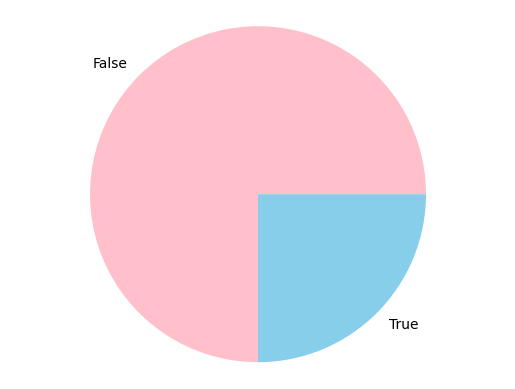

In [77]:
labels = ['False', 'True']
colours = ['pink', 'skyblue']  
sizes = [12, 4]

plt.pie(sizes, labels=labels, colors=colours,)
plt.axis('equal')
plt.title('pie_chart')
plt.show()

In [ ]:
# the relationship between single_child and 

In [79]:
sliced_survey_mbti = Survey[['single_child','comfort_zone']]
print (sliced_survey_mbti)

   single_child  comfort_zone
0           yes   by yourself
1            no   by yourself
2            no  with someone
3            no  with someone
4           yes           NaN
5           yes  with someone
6           yes  with someone
7           yes   by yourself
8            no  with someone
9           yes  with someone
10           no  with someone
11           no   by yourself
12           no   by yourself
13           no   by yourself
14           no   by yourself
15           no   by yourself
16           no   by yourself
17           no   by yourself
18           no   by yourself


In [70]:
# Hypothesis : if you are the single child, you prefer to be with someone, if you are not the single child you prefer personal space

In [82]:
def comparison_two (sliced_survey_mbti):
    single_child_list = sliced_survey_mbti['single_child'].tolist()
    comfort_zone_list = sliced_survey_mbti['comfort_zone'].tolist()
    
    comparison_results = []
  
    for single_child, comfort_zone in zip(single_child_list, comfort_zone_list):
        if single_child['no'] == place_grow_up['by yourself']:
            comparison_results.append(True)
            
        elif single_child['yes'] == place_grow_up['with someone']:
            comparison_results.append(True)
            
        else:
            comparison_results.append(False)
    
    return results
    
sliced_survey_mbti['comparison_results'] = comparison_two(sliced_survey_mbti)

print(sliced_survey_mbti)

TypeError: string indices must be integers, not 'str'

In [83]:
def comparison_two(sliced_survey_mbti):
    single_child_list = sliced_survey_mbti['single_child'].tolist()
    comfort_zone_list = sliced_survey_mbti['comfort_zone'].tolist()

    comparison_results = []
  
    for single_child, comfort_zone in zip(single_child_list, comfort_zone_list):
        if single_child == 'no' and comfort_zone == 'by yourself':
            comparison_results.append(True)
        elif single_child == 'yes' and comfort_zone == 'with someone':
            comparison_results.append(True)
        else:
            comparison_results.append(False)
    
    return comparison_results

sliced_survey_mbti['comparison_results'] = comparison_two(sliced_survey_mbti)

print(sliced_survey_mbti)


   single_child  comfort_zone  comparison_results
0           yes   by yourself               False
1            no   by yourself                True
2            no  with someone               False
3            no  with someone               False
4           yes           NaN               False
5           yes  with someone                True
6           yes  with someone                True
7           yes   by yourself               False
8            no  with someone               False
9           yes  with someone                True
10           no  with someone               False
11           no   by yourself                True
12           no   by yourself                True
13           no   by yourself                True
14           no   by yourself                True
15           no   by yourself                True
16           no   by yourself                True
17           no   by yourself                True
18           no   by yourself                True


/var/folders/8t/h_ygnqfn40n6grnn231r3rlm0000gn/T/ipykernel_46518/124230081.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_survey_mbti['comparison_results'] = comparison_two(sliced_survey_mbti)


In [104]:
final_survey = sliced_survey_mbti['comparison_results']
final_survey

0     False
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8     False
9      True
10    False
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
Name: comparison_results, dtype: bool

In [110]:
value_counts = final_survey.value_counts()
value_counts

comparison_results
True     12
False     7
Name: count, dtype: int64

TypeError: 'list' object is not callable

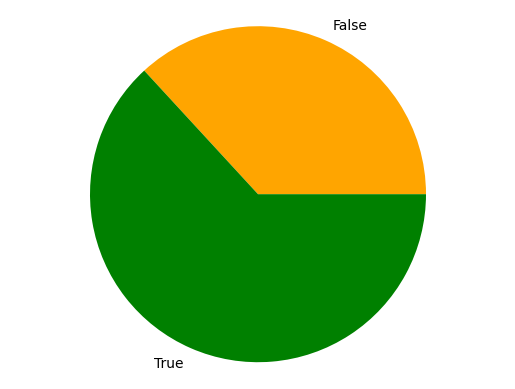

In [111]:
labels = ['False', 'True']
colours = ['orange', 'green']  
sizes = [7, 12]

plt.pie(sizes, labels=labels, colors=colours,)
plt.axis('equal')
plt.title('pie_chart')
plt.show()